In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Importing ML Files

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from matplotlib.colors import ListedColormap
from tabulate import tabulate

## Plotting Sample Data

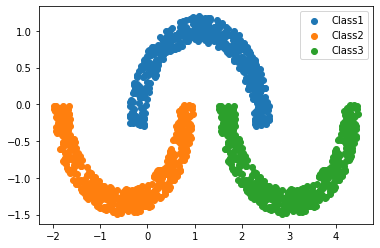

In [ ]:
plt.figure()
nonlinear_c1 = np.loadtxt('/content/drive/MyDrive/PR_A1_data/assign1_data/q2/nl_class1.txt')
nonlinear_c2 = np.loadtxt('/content/drive/MyDrive/PR_A1_data/assign1_data/q2/nl_class2.txt')
nonlinear_c3 = np.loadtxt('/content/drive/MyDrive/PR_A1_data/assign1_data/q2/nl_class3.txt')
plt.scatter(nonlinear_c1[:,0],nonlinear_c1[:,1])
plt.scatter(nonlinear_c2[:,0],nonlinear_c2[:,1])
plt.scatter(nonlinear_c3[:,0],nonlinear_c3[:,1])
plt.legend(["Class1","Class2","Class3"])

# Train Test Data Split

In [ ]:
train_c1 = nonlinear_c1[:250]
test_c1 = nonlinear_c1[250:]
train_c1_f1 = nonlinear_c1[:250,0]
train_c1_f2 = nonlinear_c1[:250,1]

train_c2 = nonlinear_c2[:250]
test_c2 = nonlinear_c2[250:]
train_c2_f1 = nonlinear_c2[:250,0]
train_c2_f2 = nonlinear_c2[:250,1]

train_c3 = nonlinear_c3[:250]
test_c3 = nonlinear_c3[250:]
train_c3_f1 = nonlinear_c3[:250,0]
train_c3_f2 = nonlinear_c3[:250,1]

test_data =np.append(test_c1,test_c2, axis=0)
test_data =np.append(test_data,test_c3, axis=0)
# print(test_c1)

# Calculating Ground Truth

In [ ]:
ground_truth =[]
for i in range(250):
  ground_truth.append(1)
for i in range(250):
  ground_truth.append(2)
for i in range(250):
  ground_truth.append(3)
# print(ground_truth)

# Mean of each class

In [ ]:

mean_c1 = np.mean(train_c1, axis=0)
mean_c2 = np.mean(train_c2, axis=0)
mean_c3 = np.mean(train_c3, axis=0)


# Variance of each class

In [ ]:
var_c1 = np.var(train_c1, axis=0)
var_c2 = np.var(train_c2, axis=0)
var_c3 = np.var(train_c3, axis=0)
print(var_c1)

[0.87391892 0.16234948]


# Covarince

In [ ]:
cov_c1 = np.cov(np.stack((train_c1_f1, train_c1_f2 ), axis = 0))
cov_c2 = np.cov(np.stack((train_c2_f1, train_c2_f2 ), axis = 0))
cov_c3 = np.cov(np.stack((train_c3_f1, train_c3_f2 ), axis = 0))

# print(cov_c1)


# Prior Probability of the each Class


In [ ]:
prior_c1 = len(train_c1)/(len(train_c1)+len(train_c2)+len(train_c3))
prior_c2 = len(train_c2)/(len(train_c1)+len(train_c2)+len(train_c3))
prior_c3 = len(train_c3)/(len(train_c1)+len(train_c2)+len(train_c3))


# Normal Distribution Function

In [ ]:
def norm_pdf_multivariate(x, mu, sigma):  
  det = np.linalg.det(sigma)
  norm_const = 1/ ( (2*np.pi) * math.sqrt(det))
  x_mu = x - mu
  inv = np.linalg.inv(sigma)
  x_mu_t =(x-mu).T  
  z=np.dot(x_mu,np.dot(inv,x_mu_t))   
  result = math.pow(math.e, -0.5 * (z))
  return norm_const * result 

# Predict Function

In [ ]:
def predict(testdata,cov_c1, cov_c2, cov_c3):
  pdf_c1=[]
  pdf_c2=[]
  pdf_c3=[]
  for x in testdata:
    pdf_x_given_c1 = norm_pdf_multivariate(x, mean_c1, cov_c1)
    pdf_c1.append(pdf_x_given_c1)
    pdf_x_given_c2 = norm_pdf_multivariate(x, mean_c2, cov_c2)
    pdf_c2.append(pdf_x_given_c2)
    pdf_x_given_c3 = norm_pdf_multivariate(x, mean_c3, cov_c3)
    pdf_c3.append(pdf_x_given_c3)
  
  evidence_x=[]
  for i in range(len(testdata)):
    evi = ((pdf_c1[i]*prior_c1) + (pdf_c2[i]*prior_c2) + (pdf_c3[i]*prior_c3))
    evidence_x.append(evi)
   
  post_c1=[]
  post_c2=[]
  post_c3=[]
  
  for i in range(len(testdata)):
    p_c1 = (pdf_c1[i] * prior_c1)/evidence_x[i]
    post_c1.append(p_c1)
    p_c2 = (pdf_c2[i] * prior_c2)/evidence_x[i]
    post_c2.append(p_c2)
    p_c3 = (pdf_c3[i] * prior_c3)/evidence_x[i]
    post_c3.append(p_c3)
  
  pred=[]
  for i in range(len(testdata)):
    p = np.argmax([post_c1[i],post_c2[i],post_c3[i]])+1
    pred.append(p)

  return pred


#Accuracy

In [ ]:
def accuracy(c11,c22,c33):
  return ((c11+c22+c33)/len(test_data))*100

#Precision

In [ ]:
def prec(a, b, c):
  return a/(a+b+c)

#Recall

In [ ]:
def recall(a, b, c):
  return a/(a+b+c)

#F-Measure 

In [ ]:
def fmeasure(p,r):
  return (2*p*r)/(p+r)


#Confusion Matrix

In [ ]:
def confusion_matrix(case,pred):

  C11=0
  C12=0
  C13=0
  C21=0
  C22=0
  C23=0
  C31=0
  C32=0
  C33=0
  
  for i in range(len(pred)):
    if pred[i]==1 and ground_truth[i]==1:
      C11+=1
    elif pred[i]==1 and ground_truth[i]==2:
      C12+=1 
    elif pred[i]==1 and ground_truth[i]==3:
      C13+=1 
    elif pred[i]==2 and ground_truth[i]==1:
      C21+=1 
    elif pred[i]==2 and ground_truth[i]==2:
      C22+=1 
    elif pred[i]==2 and ground_truth[i]==3:
      C23+=1 
    elif pred[i]==3 and ground_truth[i]==1:
      C31+=1 
    elif pred[i]==3 and ground_truth[i]==2:
      C32+=1 
    elif pred[i]==3 and ground_truth[i]==3:
      C33+=1 
  
  
  result = []
  result.append(case)

  acc = accuracy(C11 , C22, C33)
  result.append(acc)
  
  prec1 = prec(C11, C21, C31)  
  prec2 = prec(C22, C12, C32)  
  prec3 = prec(C33, C13, C23)
  prec_mean= (prec1+prec2+prec3)/3
  result.append(prec_mean)
  
  recall1 = recall(C11, C12, C13)  
  recall2 = recall(C22, C21, C23)
  recall3 = recall(C33, C31, C32)
  recall_mean = (recall1+recall2+recall3)/3
  result.append(recall_mean)

  fm1 = fmeasure(prec1 , recall1)  
  fm2 = fmeasure(prec2 , recall2)
  fm3 = fmeasure(prec3 , recall3)
  fscore = (fm1+fm2+fm3)/3
  result.append(fscore)

  return result




In [ ]:
lminx = np.min([np.min(train_c1.T[0]),np.min(train_c2.T[0]),np.min(train_c3.T[0])])
lmaxx = np.max([np.max(train_c1.T[0]),np.max(train_c2.T[0]),np.max(train_c3.T[0])])

lminy = np.min([np.min(train_c1.T[1]),np.min(train_c2.T[1]),np.min(train_c3.T[1])])
lmaxy = np.max([np.max(train_c1.T[1]),np.max(train_c2.T[1]),np.max(train_c3.T[1])])



graphx , graphy = [], []


for i in range(int(lminx), int(lmaxx)):
  for j in range(int(lminy), int(lmaxy)):
    graphx.append(i)
    graphy.append(j)

#Classifier 1

In [ ]:
avg_var = (var_c1+var_c2+var_c3)/3
id= np.identity(2,dtype="float")
case1_cov=avg_var*id

case1_pred = predict(test_data,case1_cov, case1_cov, case1_cov)

res1 = confusion_matrix("C1",case1_pred)

head = ["Classifier","Acc", "Prec","Recall","Fscore"]
data = [res1]
print(tabulate(data, headers=head, tablefmt="grid"))

+--------------+-------+--------+----------+----------+
| Classifier   |   Acc |   Prec |   Recall |   Fscore |
+==============+=======+========+==========+==========+
| C1           |  91.2 |  0.912 | 0.913181 | 0.912392 |
+--------------+-------+--------+----------+----------+


#Classifier 1 Plot

[2 2 2 ... 1 1 1]


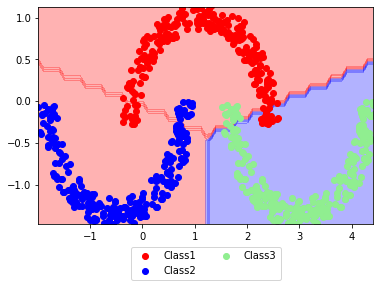

In [ ]:
colors = ('red','blue','lightgreen','gray','cyan')
cmap = ListedColormap(colors[:len(np.unique(graphy))])
resolution =0.1

xx1, xx2 = np.meshgrid(np.arange(lminx,lmaxx,resolution), np.arange(lminy,lmaxy,resolution))

data = np.array([xx1.ravel(), xx2.ravel()]).T
Z = np.array(predict(data,case1_cov, case1_cov, case1_cov))
print(Z)
Z = Z.reshape(xx1.shape)

plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
plt.xlim(xx1.min(),xx1.max())
plt.ylim(xx2.min(),xx2.max())

plt.scatter(train_c1[:,0], train_c1[:,1], marker='o', color=colors[0], label='Class1')
plt.scatter(train_c2[:,0], train_c2[:,1], marker='o', color=colors[1], label='Class2')
plt.scatter(train_c3[:,0], train_c3[:,1], marker='o', color=colors[2], label='Class3')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -.08), ncol=2)

plt.show()



#Classifier 2


In [ ]:
case2_cov = (cov_c1+cov_c2+cov_c3)/3
case2_pred = predict(test_data,case2_cov, case2_cov, case2_cov)
res2 = confusion_matrix("C2",case2_pred)


head = ["Classifier","Acc", "Prec","Recall","Fscore"]
data = [res2]
print(tabulate(data, headers=head, tablefmt="grid"))

+--------------+-------+--------+----------+----------+
| Classifier   |   Acc |   Prec |   Recall |   Fscore |
+==============+=======+========+==========+==========+
| C2           |  91.2 |  0.912 | 0.913181 | 0.912392 |
+--------------+-------+--------+----------+----------+


#Classifier 2 Plot

[2 2 2 ... 1 1 1]


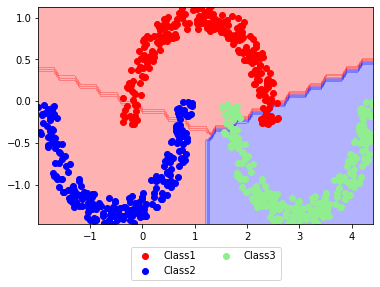

In [ ]:
colors = ('red','blue','lightgreen','gray','cyan')
cmap = ListedColormap(colors[:len(np.unique(graphy))])
resolution =0.1

xx1, xx2 = np.meshgrid(np.arange(lminx,lmaxx,resolution), np.arange(lminy,lmaxy,resolution))

data = np.array([xx1.ravel(), xx2.ravel()]).T
Z = np.array(predict(data,case2_cov, case2_cov, case2_cov))
print(Z)
Z = Z.reshape(xx1.shape)

plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
plt.xlim(xx1.min(),xx1.max())
plt.ylim(xx2.min(),xx2.max())

plt.scatter(train_c1[:,0], train_c1[:,1], marker='o', color=colors[0], label='Class1')
plt.scatter(train_c2[:,0], train_c2[:,1], marker='o', color=colors[1], label='Class2')
plt.scatter(train_c3[:,0], train_c3[:,1], marker='o', color=colors[2], label='Class3')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -.08), ncol=2)

plt.show()



#Classifier 3

In [ ]:
cov_c1[0,1]=0
cov_c1[1,0]=0
cov_c2[0,1]=0
cov_c2[1,0]=0
cov_c3[0,1]=0
cov_c3[1,0]=0

case3_pred = predict(test_data,cov_c1, cov_c2, cov_c3)
res3 = confusion_matrix("C3",case3_pred)


head = ["Classifier","Acc", "Prec","Recall","Fscore"]
data = [res3]
print(tabulate(data, headers=head, tablefmt="grid"))

+--------------+-------+--------+----------+----------+
| Classifier   |   Acc |   Prec |   Recall |   Fscore |
+==============+=======+========+==========+==========+
| C3           |  91.6 |  0.916 | 0.916235 |  0.91607 |
+--------------+-------+--------+----------+----------+


#Classifier 3 Plot

[2 2 2 ... 1 1 1]


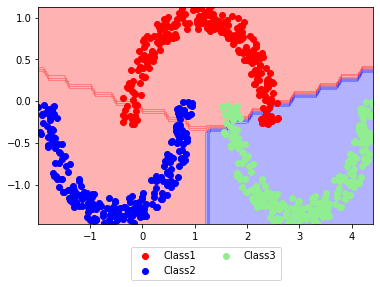

In [ ]:
colors = ('red','blue','lightgreen','gray','cyan')
cmap = ListedColormap(colors[:len(np.unique(graphy))])
resolution =0.1

xx1, xx2 = np.meshgrid(np.arange(lminx,lmaxx,resolution), np.arange(lminy,lmaxy,resolution))

data = np.array([xx1.ravel(), xx2.ravel()]).T
Z = np.array(predict(data,cov_c1, cov_c1, cov_c1))
print(Z)
Z = Z.reshape(xx1.shape)

plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
plt.xlim(xx1.min(),xx1.max())
plt.ylim(xx2.min(),xx2.max())

plt.scatter(train_c1[:,0], train_c1[:,1], marker='o', color=colors[0], label='Class1')
plt.scatter(train_c2[:,0], train_c2[:,1], marker='o', color=colors[1], label='Class2')
plt.scatter(train_c3[:,0], train_c3[:,1], marker='o', color=colors[2], label='Class3')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -.08), ncol=2)

plt.show()



# Classifier 4

In [ ]:
case4_cov_c1 = np.cov(np.stack((train_c1_f1, train_c1_f2 ), axis = 0))
case4_cov_c2 = np.cov(np.stack((train_c2_f1, train_c2_f2 ), axis = 0))
case4_cov_c3 = np.cov(np.stack((train_c3_f1, train_c3_f2 ), axis = 0))

case4_pred = predict(test_data,case4_cov_c1, case4_cov_c2, case4_cov_c3)
res4 = confusion_matrix("C4",case4_pred)



head = ["Classifier","Acc", "Prec","Recall","Fscore"]
data = [res4]
print(tabulate(data, headers=head, tablefmt="grid"))

+--------------+-------+--------+----------+----------+
| Classifier   |   Acc |   Prec |   Recall |   Fscore |
+==============+=======+========+==========+==========+
| C4           |    92 |   0.92 | 0.920364 |  0.91997 |
+--------------+-------+--------+----------+----------+


#Classifier 4 Plot

[2 2 2 ... 1 1 1]


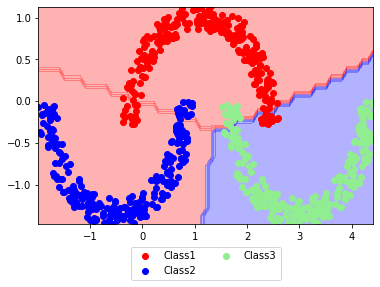

In [ ]:
colors = ('red','blue','lightgreen','gray','cyan')
cmap = ListedColormap(colors[:len(np.unique(graphy))])
resolution =0.1

xx1, xx2 = np.meshgrid(np.arange(lminx,lmaxx,resolution), np.arange(lminy,lmaxy,resolution))

data = np.array([xx1.ravel(), xx2.ravel()]).T
Z = np.array(predict(data,case4_cov_c1, case4_cov_c2, case4_cov_c3))
print(Z)
Z = Z.reshape(xx1.shape)

plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
plt.xlim(xx1.min(),xx1.max())
plt.ylim(xx2.min(),xx2.max())

plt.scatter(train_c1[:,0], train_c1[:,1], marker='o', color=colors[0], label='Class1')
plt.scatter(train_c2[:,0], train_c2[:,1], marker='o', color=colors[1], label='Class2')
plt.scatter(train_c3[:,0], train_c3[:,1], marker='o', color=colors[2], label='Class3')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -.08), ncol=2)

plt.show()



# Tabular Result

In [ ]:
head = ["Classifier","Acc", "Prec","Recall","Fscore"]
data = [res1,res2,res3,res4]
print(tabulate(data, headers=head, tablefmt="grid"))

+--------------+-------+--------+----------+----------+
| Classifier   |   Acc |   Prec |   Recall |   Fscore |
+==============+=======+========+==========+==========+
| C1           |  91.2 |  0.912 | 0.913181 | 0.912392 |
+--------------+-------+--------+----------+----------+
| C2           |  91.2 |  0.912 | 0.913181 | 0.912392 |
+--------------+-------+--------+----------+----------+
| C3           |  91.6 |  0.916 | 0.916235 | 0.91607  |
+--------------+-------+--------+----------+----------+
| C4           |  92   |  0.92  | 0.920364 | 0.91997  |
+--------------+-------+--------+----------+----------+
